#Import 

In [ ]:
#@title Default title text
import tensorflow as tf
import numpy as np
import pandas as pd
from datetime import datetime, time, date
import matplotlib.pyplot as plt

# Training on GPU


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config=ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction=0.9
config.gpu_options.allow_growth =True
session= InteractiveSession(config=config)

# Mounting on google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Share Price prediction/Asian_paints_15Y.csv",index_col="Date",parse_dates=True)  
dfv=pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Share Price prediction/HINDUUNI_15Y.csv",index_col="Date",parse_dates=True)

In [ ]:
df.isna().any()
dfv.isna().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [ ]:
df=df.dropna()
dfv=dfv.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3878 entries, 2005-01-17 to 2020-10-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3878 non-null   float64
 1   High       3878 non-null   float64
 2   Low        3878 non-null   float64
 3   Close      3878 non-null   float64
 4   Adj Close  3878 non-null   float64
 5   Volume     3878 non-null   float64
dtypes: float64(6)
memory usage: 212.1 KB


# Plot data

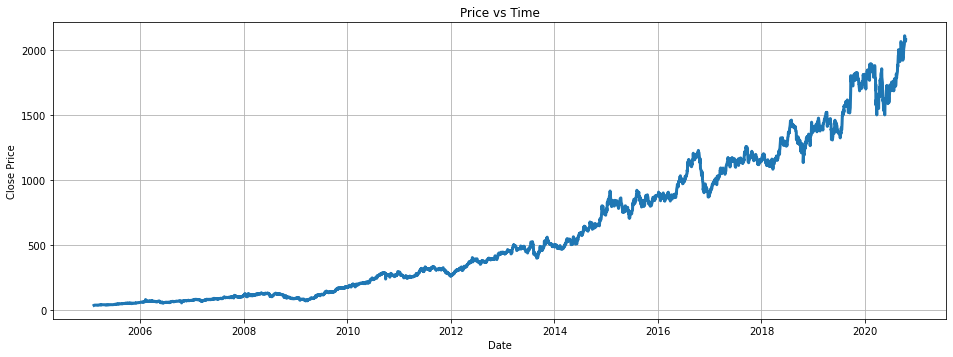

In [ ]:
dates=df.index
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
plt.plot(dates[14:],df.iloc[14:,0].values, linewidth =3)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("Price vs Time")
plt.grid()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-17,31.500000,31.910000,31.299999,31.844999,7.543048,64970.0
2005-01-18,31.500000,32.000000,31.500000,31.930000,7.563182,63840.0
2005-01-19,32.299999,32.500000,31.770000,32.259998,7.641345,623920.0
2005-01-20,32.900002,33.200001,32.000000,32.404999,7.675693,161410.0
2005-01-24,32.400002,33.740002,32.099998,32.985001,7.813076,1160320.0
...,...,...,...,...,...,...
2020-10-09,2090.000000,2107.149902,2046.449951,2050.399902,2050.399902,45926.0
2020-10-12,2077.000000,2085.949951,2041.449951,2076.899902,2076.899902,41379.0
2020-10-13,2072.000000,2112.899902,2054.399902,2064.750000,2064.750000,48983.0


In [ ]:
df2=np.array(df.iloc[:,3]).reshape(-1,1)
dfv2=np.array(dfv.iloc[:,3]).reshape(-1,1)

In [ ]:
dfv2

array([[ 142.600006],
       [ 142.050003],
       [ 142.149994],
       ...,
       [2158.149902],
       [2152.550049],
       [2150.550049]])

In [ ]:
#70% training data & 30% testing data

#training_size=int((len(df1)-14)*0.7)
#test_size=(len(dfv1)-14)-training_size
test_size=(len(dfv))
test_data=dfv2[0:test_size,:]

#training_data,test_data = df2[0 : training_size, :], df2[training_size:len(df2),:] 
# test data is  ==>  from 0.7*total to end
training_size=int(len(df))
training_data=df2[0:training_size,:]

In [ ]:
from 

# Creating dataset

In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, timestep):
    dataX,dataY=[] , []
    for i in range (len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]                         #Ex - storing the values from 1 to 50
        dataX.append(a)
        dataY.append(dataset[i+timestep, 0])     #Ex - The output will be 51st day closing price
    return  np.array(dataX), np.array(dataY)

In [ ]:
# creating train data and test data
timestep=100
X_train, Y_train =create_dataset(training_data, timestep)
print("X_train will start from "+str(timestep)+" to "+str(len(training_data)-timestep) )
X_test, Y_test = create_dataset(test_data, timestep)

# the test set will be ==>  from (total - timestep-1) to (total-1)

X_train will start from 100 to 3778


In [ ]:
X_train.shape,Y_train.shape

((3777, 100), (3777,))

In [ ]:
# reshaping the in 3D
# for LSTM we have input shape as (n_x, m, T_x) -- 3D
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)   #Shape ==> ((training_size - timestep-1),timestep, 1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape)
print(X_test.shape)

(3777, 100, 1)
(3775, 100, 1)


# Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:


"""
TO UNDERSTAND THE LSTM INPUT/OUTPUT SHAPE ---
https://medium.com/@shivajbd/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e
"""

"""
TO UNDERSTAND RETURN SEQUENCES ---
https://www.dlology.com/blog/how-to-use-return_state-or-return_sequences-in-keras/

return sequences= True  gives the output for all the time steps
if return sequences = False returns the putput of the last timestep  -- RNN layer will only return the last hidden state output a<T>
"""

"""
STACKED LSTM ---
https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
"""

model =Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1],1)))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))

model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(
    name="root_mean_squared_error", dtype=None
)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100, 100)          20800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 202,101
Trainable params: 202,101
Non-trainable params: 0
_________________________________________________________________


# Creating a checkpoint to store the weights

In [ ]:
import os
#checkpoint_path = "D:\Python codes\Share price prediction\Trained weights\Bidirectional RNN with RSI/cp.ckpt"      #Run and save on computert
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Share Price prediction/Prediction using bidirectional RNN/cp.ckpt"                                                                 #Save on drive
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [30]:
model_history=model.fit(X_train,Y_train,validation_data =(X_test, Y_test), 
                    epochs=50, 
                    batch_size=32,
                     verbose=1,
                    callbacks=[cp_callback])

Epoch 1/50
119/119 [==============================] - ETA: 0s - loss: 643808.5000 - root_mean_squared_error: 802.3768
Epoch 00001: saving model to /content/drive/MyDrive/Colab Notebooks/Share Price prediction/Prediction using bidirectional RNN/cp.ckpt
119/119 [==============================] - 45s 376ms/step - loss: 643808.5000 - root_mean_squared_error: 802.3768 - val_loss: 1891357687808.0000 - val_root_mean_squared_error: 1375266.3750
Epoch 2/50
119/119 [==============================] - ETA: 0s - loss: 643561.7500 - root_mean_squared_error: 802.2230
Epoch 00002: saving model to /content/drive/MyDrive/Colab Notebooks/Share Price prediction/Prediction using bidirectional RNN/cp.ckpt
119/119 [==============================] - 45s 378ms/step - loss: 643561.7500 - root_mean_squared_error: 802.2230 - val_loss: 1891357687808.0000 - val_root_mean_squared_error: 1375266.3750
Epoch 3/50
119/119 [==============================] - ETA: 0s - loss: 643346.6875 - root_mean_squared_error: 802.0889


KeyboardInterrupt: ignored

In [ ]:
train_predict=model.predict(X_train)
test_predict= model.predict(X_test)
X_train.shape, train_predict.shape

((3763, 100, 1), (3763, 1))

In [ ]:
df2

array([[3.45000000e+01, 3.52999990e+01],
       [3.41749990e+01, 3.52050020e+01],
       [8.33892400e+00, 7.35200000e+04],
       ...,
       [2.07760010e+03, 2.12280005e+03],
       [2.06944995e+03, 2.08939990e+03],
       [2.08939990e+03, 2.03353000e+05]])

train end at  3863
test start at 3964
test end at 11591
Test length 7627
The shape of X_test 3761


ValueError: ignored

<Figure size 576x216 with 0 Axes>

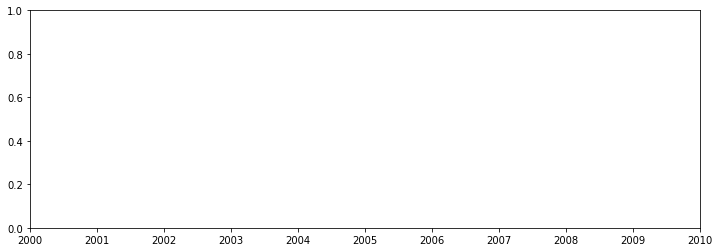

In [ ]:
dates= df[14:].index
datesv=dfv[14:].index
plt.figure(figsize=(8,3))
look_back=100
# Shift train predictions for plotting
trainplot=np.empty_like(df2[:,0]).reshape(-1,1)
trainplot[:, :] =np.nan
trainplot[look_back:len(train_predict)+look_back, :] = train_predict   
print("train end at ",len(train_predict)+look_back)

# Shift test predictions for plotting
testplot=np.empty_like(dfv2[:,0]).reshape(-1,1)
testplot[:, :] =np.nan

print("test start at",len(train_predict)+2*look_back+1)
print("test end at",len(df2)-1)
print("Test length",len(df2)-1-(len(train_predict)+2*look_back+1))
print("The shape of X_test",X_test.shape[0])

#testplot[len(test_predict)+2*look_back+1:len(dfv2)-1, :] = test_predict
testplot[look_back:len(test_predict)+look_back, :] = test_predict     
#2*look_back covers the previous the previous 100 timesteps data included in training/testing the model
# For testing the data will come from (len(train_predict+look_back) : len(train_predict+2*look_back) ) 
#==> the first prediction will come at [len(train_predict)+2*look_back+1]

# Plotting baseline and predictions
#%matplotlib tk
#%matplotlib qt
plt.figure(figsize=(12,4))
#plt.plot((np.array(dates[14:]).reshape(-1,1)),sc1.inverse_transform(np.array(df2[:,0].reshape(-1,1))), label="Actual price of asian paints")
#plt.plot(dates[14:],trainplot,linewidth=3,label="Data used for training the AI model")
#plt.plot(dates[14:],testplot,linewidth=3, label ="Predicted Price of asian paints")

#plt.plot(dates,(np.array(sc1.inverse_transform(np.array(df2[:,0].reshape(-1,1))))),label ="Actual Price of  asian paints",linewidth=3 )
plt.plot(dates,(np.array(np.array(df2[:,0].reshape(-1,1)))),label ="Actual Price of  asian paints",linewidth=3 )
plt.plot(dates,trainplot,label="Trained",linewidth=3)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid()
plt.show()

plt.figure(figsize=(12,4))
#plt.plot(datesv,(np.array(sc1.inverse_transform(np.array(dfv2[:,0].reshape(-1,1))))),label ="Actual Price of  Hindustan Unilever",linewidth=3)
plt.plot(datesv,(np.array(np.array(dfv2[:,0].reshape(-1,1)))),label ="Actual Price of  Hindustan Unilever",linewidth=3)
plt.plot(datesv,testplot,linewidth=3, label ="Predicted Price of Hindu-uni")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()